<a href="https://www.kaggle.com/code/rahulkotecha/pistachio-16-features?scriptVersionId=94221949" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

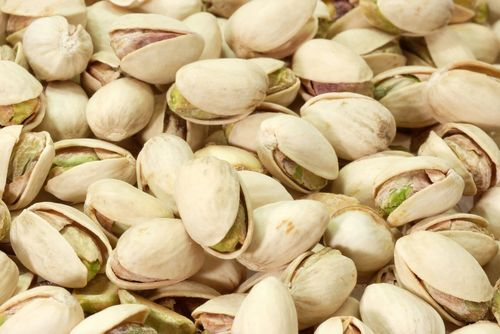

"Citation Request :
1. OZKAN IA., KOKLU M. and SARACOGLU R. (2021). Classification of Pistachio Species Using Improved K-NN Classifier. Progress in Nutrition, Vol. 23, N. 2, pp. DOI:10.23751/pn.v23i2.9686.  (Open Access) 

2. SINGH D, TASPINAR YS, KURSUN R, CINAR I, KOKLU M, OZKAN IA, LEE H-N., (2022). Classification and Analysis of Pistachio Species with Pre-Trained Deep Learning Models, Electronics, 11 (7), 981. https://doi.org/10.3390/electronics11070981. (Open Access)

DATASET: https://www.muratkoklu.com/datasets/
Article Download (PDF): https://www.mattioli1885journals.com/index.php/progressinnutrition/article/view/9686/9178
https://www.mdpi.com/2079-9292/11/7/981/pdf"


In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pistachio-dataset/Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.arff
/kaggle/input/pistachio-dataset/Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xls
/kaggle/input/pistachio-dataset/Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset_Citation_Request.txt
/kaggle/input/pistachio-dataset/Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xlsx
/kaggle/input/pistachio-dataset/Pistachio_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.arff
/kaggle/input/pistachio-dataset/Pistachio_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xlsx
/kaggle/input/pistachio-dataset/Pistachio_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset_Citation_Request.txt
/kaggle/input/pistachio-dataset/Pistachio_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xls


In [2]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 4.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_excel("/kaggle/input/pistachio-dataset/Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xlsx")

In [5]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           2148 non-null   int64  
 1   PERIMETER      2148 non-null   float64
 2   MAJOR_AXIS     2148 non-null   float64
 3   MINOR_AXIS     2148 non-null   float64
 4   ECCENTRICITY   2148 non-null   float64
 5   EQDIASQ        2148 non-null   float64
 6   SOLIDITY       2148 non-null   float64
 7   CONVEX_AREA    2148 non-null   int64  
 8   EXTENT         2148 non-null   float64
 9   ASPECT_RATIO   2148 non-null   float64
 10  ROUNDNESS      2148 non-null   float64
 11  COMPACTNESS    2148 non-null   float64
 12  SHAPEFACTOR_1  2148 non-null   float64
 13  SHAPEFACTOR_2  2148 non-null   float64
 14  SHAPEFACTOR_3  2148 non-null   float64
 15  SHAPEFACTOR_4  2148 non-null   float64
 16  Class          2148 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 28

In [7]:
df.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

In [8]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,0.569172,0.713077,0.005701,0.003017,0.510461,0.955239
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,0.212760,0.044547,0.000817,0.000340,0.063942,0.051840
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,0.371250,0.681550,0.005200,0.002800,0.464475,0.944000
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,0.643400,0.710700,0.005600,0.003000,0.505150,0.973100
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,0.744125,0.741650,0.006100,0.003200,0.550075,0.987300
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.877900,0.013100,0.005300,0.770600,0.999000


In [9]:
df.describe(include=["object"])

,Class
count,2148
unique,2
top,Kirmizi_Pistachio
freq,1232


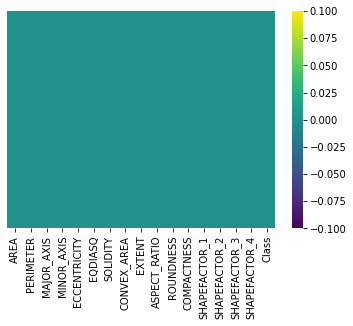

In [10]:
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [11]:
df["Class"].value_counts()

Kirmizi_Pistachio    1232
Siit_Pistachio        916
Name: Class, dtype: int64

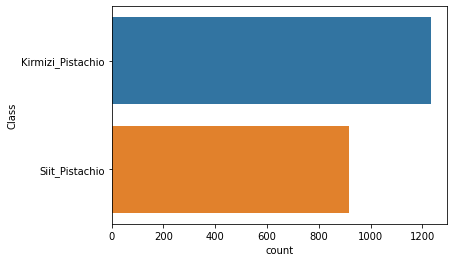

In [12]:
sns.countplot(data=df,y="Class")
plt.show()

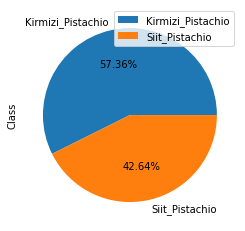

In [13]:
df["Class"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.legend(df["Class"].unique())
plt.show()

In [14]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df["Class"]=oe.fit_transform(df[["Class"]])

In [15]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,0.0
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,0.0
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,0.0
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,0.0
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,0.0


In [16]:
oe.categories_

[array(['Kirmizi_Pistachio', 'Siit_Pistachio'], dtype=object)]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           2148 non-null   int64  
 1   PERIMETER      2148 non-null   float64
 2   MAJOR_AXIS     2148 non-null   float64
 3   MINOR_AXIS     2148 non-null   float64
 4   ECCENTRICITY   2148 non-null   float64
 5   EQDIASQ        2148 non-null   float64
 6   SOLIDITY       2148 non-null   float64
 7   CONVEX_AREA    2148 non-null   int64  
 8   EXTENT         2148 non-null   float64
 9   ASPECT_RATIO   2148 non-null   float64
 10  ROUNDNESS      2148 non-null   float64
 11  COMPACTNESS    2148 non-null   float64
 12  SHAPEFACTOR_1  2148 non-null   float64
 13  SHAPEFACTOR_2  2148 non-null   float64
 14  SHAPEFACTOR_3  2148 non-null   float64
 15  SHAPEFACTOR_4  2148 non-null   float64
 16  Class          2148 non-null   float64
dtypes: float64(15), int64(2)
memory usage: 285.4 KB


In [18]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,0.569172,0.713077,0.005701,0.003017,0.510461,0.955239,0.426443
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,0.212760,0.044547,0.000817,0.000340,0.063942,0.051840,0.494675
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400,0.000000
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,0.371250,0.681550,0.005200,0.002800,0.464475,0.944000,0.000000
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,0.643400,0.710700,0.005600,0.003000,0.505150,0.973100,0.000000
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,0.744125,0.741650,0.006100,0.003200,0.550075,0.987300,1.000000
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.877900,0.013100,0.005300,0.770600,0.999000,1.000000


In [19]:
from scipy.stats import skew

AREA
Skewness: -0.2725996690363421


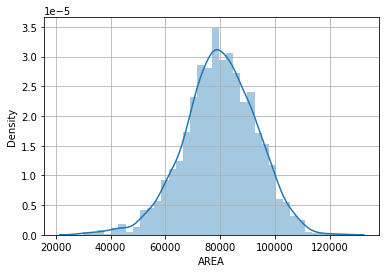

PERIMETER
Skewness: 1.3418407803468597


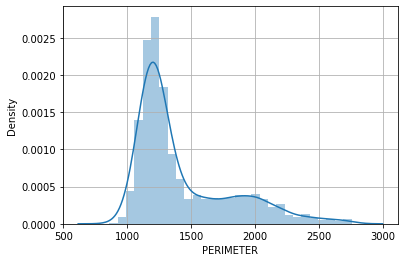

MAJOR_AXIS
Skewness: -0.4742455416356089


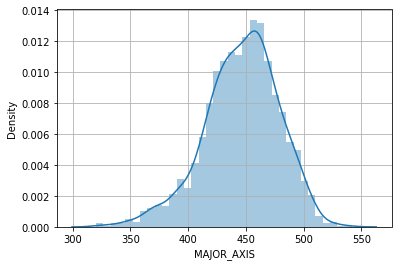

MINOR_AXIS
Skewness: 0.1491271563265608


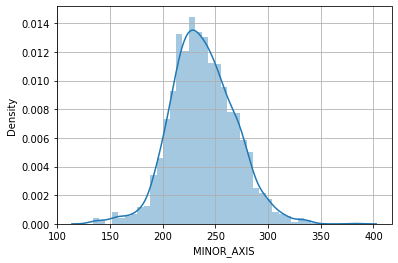

ECCENTRICITY
Skewness: -1.4551064878125315


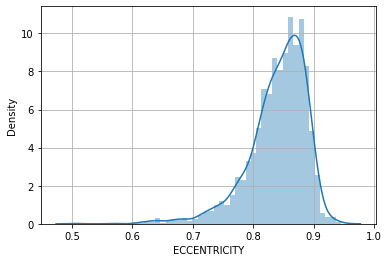

EQDIASQ
Skewness: -0.6159177765587933


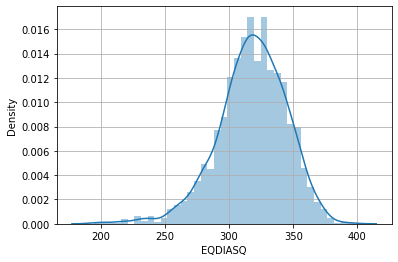

SOLIDITY
Skewness: -1.8865281329301278


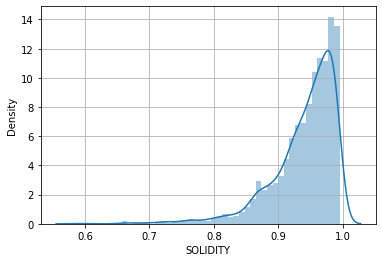

CONVEX_AREA
Skewness: -0.1785442510846831


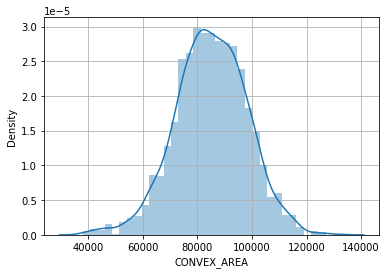

EXTENT
Skewness: -1.1495287458130574


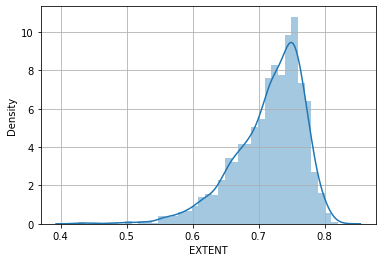

ASPECT_RATIO
Skewness: 0.19285188694843766


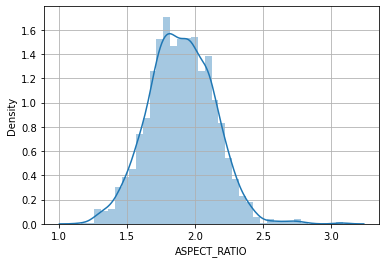

ROUNDNESS
Skewness: -0.5479905956440515


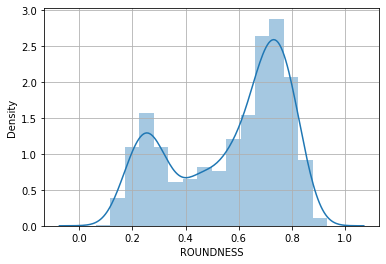

COMPACTNESS
Skewness: 0.16337731439223407


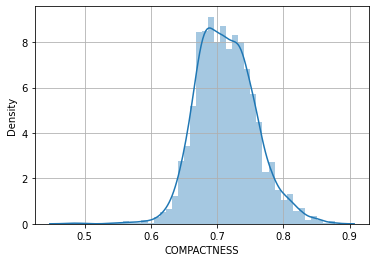

SHAPEFACTOR_1
Skewness: 1.859890260146182


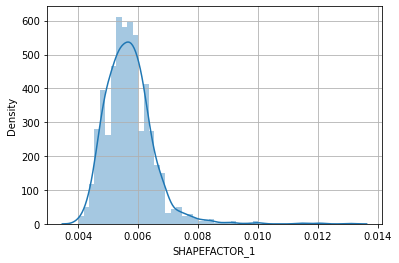

SHAPEFACTOR_2
Skewness: 1.8888293879332625


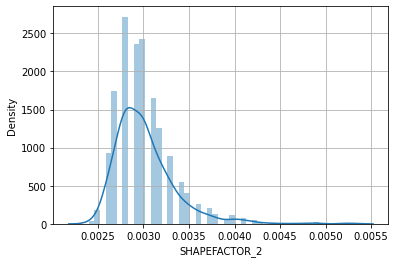

SHAPEFACTOR_3
Skewness: 0.42092528419127784


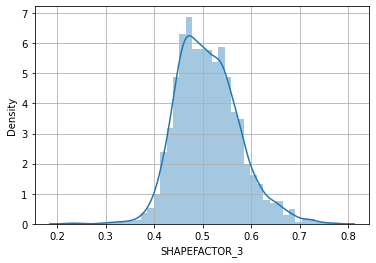

SHAPEFACTOR_4
Skewness: -2.64480607832139


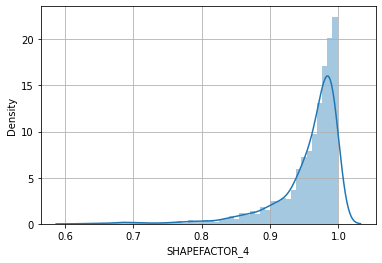

Class
Skewness: 0.2974637111402974


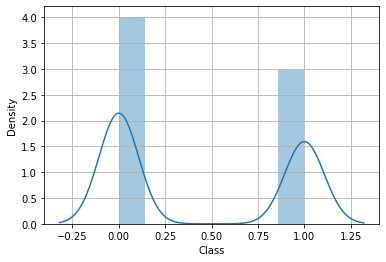

In [20]:
for col in df:
    print(col)
    print(f"Skewness: {skew(df[col])}")
    
    plt.figure()
    sns.distplot(df[col])
    plt.grid(True)
    plt.show()

In [21]:
df.corr()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
AREA,1.000000,0.115941,0.697782,0.795881,-0.358892,0.997399,0.363959,0.943877,0.331784,-0.424025,0.250423,0.551711,-0.892493,-0.652205,0.545091,0.297043,0.589226
PERIMETER,0.115941,1.000000,0.094296,0.390740,-0.334483,0.113631,-0.671046,0.364474,-0.403916,-0.312373,-0.891777,0.044624,-0.081031,0.279590,0.047527,-0.631700,0.145290
MAJOR_AXIS,0.697782,0.094296,1.000000,0.272578,0.298836,0.705333,0.247822,0.661892,0.186830,0.265049,0.153592,-0.201121,-0.391310,-0.796526,-0.208956,0.201741,0.136845
MINOR_AXIS,0.795881,0.390740,0.272578,1.000000,-0.816731,0.793155,-0.085556,0.890003,0.047442,-0.839078,-0.066594,0.773512,-0.851167,-0.087657,0.771658,-0.181450,0.668126
ECCENTRICITY,-0.358892,-0.334483,0.298836,-0.816731,1.000000,-0.352723,0.257060,-0.482713,0.080967,0.943751,0.171669,-0.846851,0.580983,-0.394392,-0.855222,0.325602,-0.546759
EQDIASQ,0.997399,0.113631,0.705333,0.793155,-0.352723,1.000000,0.372779,0.940651,0.340073,-0.423318,0.254242,0.549971,-0.906893,-0.665368,0.541747,0.302469,0.577300
SOLIDITY,0.363959,-0.671046,0.247822,-0.085556,0.257060,0.372779,1.000000,0.042000,0.678599,0.177830,0.779134,0.226165,-0.380619,-0.727156,0.215860,0.949501,0.125347
CONVEX_AREA,0.943877,0.364474,0.661892,0.890003,-0.482713,0.940651,0.042000,1.000000,0.122881,-0.522637,-0.007125,0.515907,-0.834649,-0.447161,0.511311,-0.017052,0.584618
EXTENT,0.331784,-0.403916,0.186830,0.047442,0.080967,0.340073,0.678599,0.122881,1.000000,0.023303,0.512278,0.254064,-0.369237,-0.510576,0.245638,0.650896,0.100200
ASPECT_RATIO,-0.424025,-0.312373,0.265049,-0.839078,0.943751,-0.423318,0.177830,-0.522637,0.023303,1.000000,0.115896,-0.896857,0.677735,-0.315574,-0.892523,0.250587,-0.581469


In [22]:
df.corr()["Class"].sort_values()

SHAPEFACTOR_1   -0.615513
ASPECT_RATIO    -0.581469
ECCENTRICITY    -0.546759
SHAPEFACTOR_2   -0.126188
SHAPEFACTOR_4    0.063084
EXTENT           0.100200
ROUNDNESS        0.105768
SOLIDITY         0.125347
MAJOR_AXIS       0.136845
PERIMETER        0.145290
EQDIASQ          0.577300
CONVEX_AREA      0.584618
AREA             0.589226
COMPACTNESS      0.624939
SHAPEFACTOR_3    0.626304
MINOR_AXIS       0.668126
Class            1.000000
Name: Class, dtype: float64

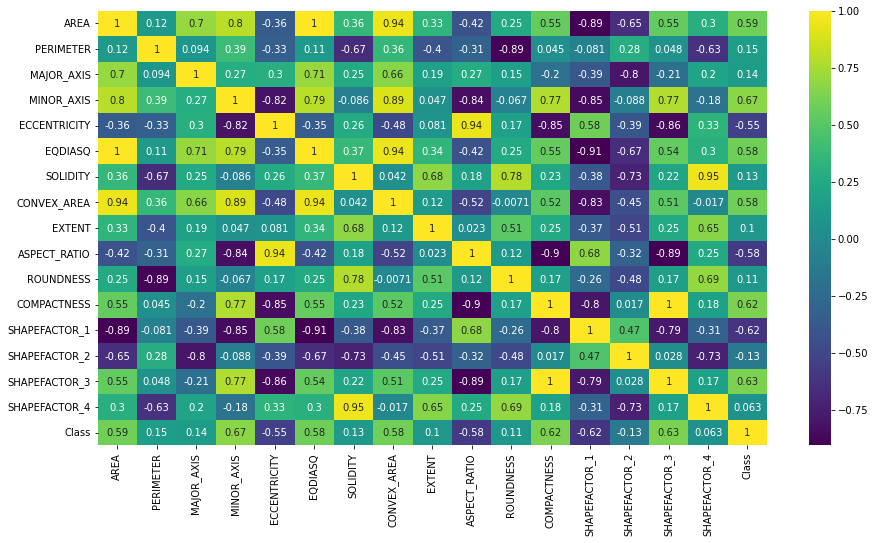

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

In [24]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

In [25]:
x=df.iloc[ : , :-1]
x.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833


In [26]:
y=df.iloc[ : ,-1]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [31]:
accuracy_score(ytest,ypred)

0.8496124031007752

In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       377
         1.0       0.82      0.82      0.82       268

    accuracy                           0.85       645
   macro avg       0.84      0.85      0.85       645
weighted avg       0.85      0.85      0.85       645



In [33]:
confusion_matrix(ytest,ypred)

array([[327,  50],
       [ 47, 221]])

#### Hyper-Paramater Tuning

In [34]:
accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

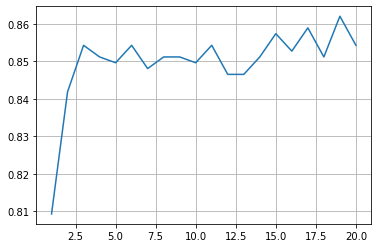

In [35]:
plt.plot(range(1,21),accuracy)
plt.grid(True)
plt.show()

In [36]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [37]:
accuracy_score(ytest,ypred)

0.862015503875969

In [38]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       377
         1.0       0.83      0.84      0.83       268

    accuracy                           0.86       645
   macro avg       0.86      0.86      0.86       645
weighted avg       0.86      0.86      0.86       645



In [39]:
confusion_matrix(ytest,ypred)

array([[331,  46],
       [ 43, 225]])

#### Cross Validation Score

In [40]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.75813953 0.76046512 0.78372093 0.76689977 0.78554779]
CVS Mean: 0.7709546267685803
CVS Standard Deviation: 0.01154674920635349


#### Bagging

In [41]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(knn)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [42]:
accuracy_score(ytest,ypred)

0.8558139534883721

In [43]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       377
         1.0       0.83      0.82      0.83       268

    accuracy                           0.86       645
   macro avg       0.85      0.85      0.85       645
weighted avg       0.86      0.86      0.86       645



In [44]:
confusion_matrix(ytest,ypred)

array([[331,  46],
       [ 47, 221]])

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [46]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       377
         1.0       0.82      0.84      0.83       268

    accuracy                           0.86       645
   macro avg       0.85      0.86      0.85       645
weighted avg       0.86      0.86      0.86       645



In [47]:
accuracy_score(ytest,ypred)

0.8573643410852713

In [48]:
confusion_matrix(ytest,ypred)

array([[327,  50],
       [ 42, 226]])

#### Hyper-Parameter Tuning

In [49]:
params={
    "C": np.logspace(-3,3,7),
    "solver": ["liblinear","lbfgs","sag","saga","newton-cg"],
    "penalty": ["l1","l2","elasticnet"]
}

In [50]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(logreg,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.570 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.570 total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.001, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.001, pena

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             verbose=3)

In [51]:
grid.best_params_

{'C': 1000.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [52]:
grid.best_score_

0.8815570321151718

In [53]:
grid.best_estimator_

LogisticRegression(C=1000.0, solver='liblinear')

In [54]:
logreg=grid.best_estimator_
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [55]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       377
         1.0       0.81      0.84      0.82       268

    accuracy                           0.85       645
   macro avg       0.85      0.85      0.85       645
weighted avg       0.85      0.85      0.85       645



In [56]:
accuracy_score(ytest,ypred)

0.8511627906976744

In [57]:
confusion_matrix(ytest,ypred)

array([[324,  53],
       [ 43, 225]])

#### Cross Validation Score

In [58]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(logreg,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.86046512 0.89302326 0.86511628 0.84848485 0.86480186]
CVS Mean: 0.8663782728899008
CVS Standard Deviation: 0.014623083559418479


#### Bagging

In [59]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(logreg)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [60]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       377
         1.0       0.81      0.84      0.82       268

    accuracy                           0.85       645
   macro avg       0.85      0.85      0.85       645
weighted avg       0.85      0.85      0.85       645



In [61]:
accuracy_score(ytest,ypred)

0.8511627906976744

In [62]:
confusion_matrix(ytest,ypred)

array([[325,  52],
       [ 44, 224]])

# Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)

In [64]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       377
         1.0       0.80      0.84      0.82       268

    accuracy                           0.84       645
   macro avg       0.84      0.84      0.84       645
weighted avg       0.85      0.84      0.85       645



In [65]:
accuracy_score(ytest,ypred)

0.8449612403100775

In [66]:
confusion_matrix(ytest,ypred)

array([[319,  58],
       [ 42, 226]])

#### Cross Validation Score

In [67]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(nb,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.80930233 0.81395349 0.80697674 0.79254079 0.83682984]
CVS Mean: 0.8119206375020329
CVS Standard Deviation: 0.014362985225693792


#### Bagging

In [68]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(nb)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [69]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       377
         1.0       0.80      0.84      0.82       268

    accuracy                           0.85       645
   macro avg       0.84      0.85      0.84       645
weighted avg       0.85      0.85      0.85       645



In [70]:
accuracy_score(ytest,ypred)

0.8465116279069768

In [71]:
confusion_matrix(ytest,ypred)

array([[320,  57],
       [ 42, 226]])

# Decision Tree

In [72]:
from sklearn import tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [74]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       377
         1.0       0.74      0.78      0.76       268

    accuracy                           0.79       645
   macro avg       0.79      0.79      0.79       645
weighted avg       0.80      0.79      0.79       645



In [75]:
accuracy_score(ytest,ypred)

0.7937984496124031

In [76]:
confusion_matrix(ytest,ypred)

array([[303,  74],
       [ 59, 209]])

#### Hyper-Parameter Tuning

Criterion-->"GINI"

In [77]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="gini",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8589147286821706 4


In [78]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8558139534883721 12


Criterion-->"ENTROPY"

In [79]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8511627906976744 4


In [80]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8589147286821706 14


###### Summary
Criterion-"GINI"
    - Max depth tuning:86.20%,
    - Min samples leaf tuning:85.74%
    
 
Criterion-"ENTROPY"
    - Max depth tuning:85.11%,
    - Min samples leaf tuning:85.89%

In [81]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=4)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [82]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       377
         1.0       0.82      0.84      0.83       268

    accuracy                           0.86       645
   macro avg       0.85      0.86      0.86       645
weighted avg       0.86      0.86      0.86       645



In [83]:
accuracy_score(ytest,ypred)

0.8589147286821706

In [84]:
confusion_matrix(ytest,ypred)

array([[329,  48],
       [ 43, 225]])

#### Tree

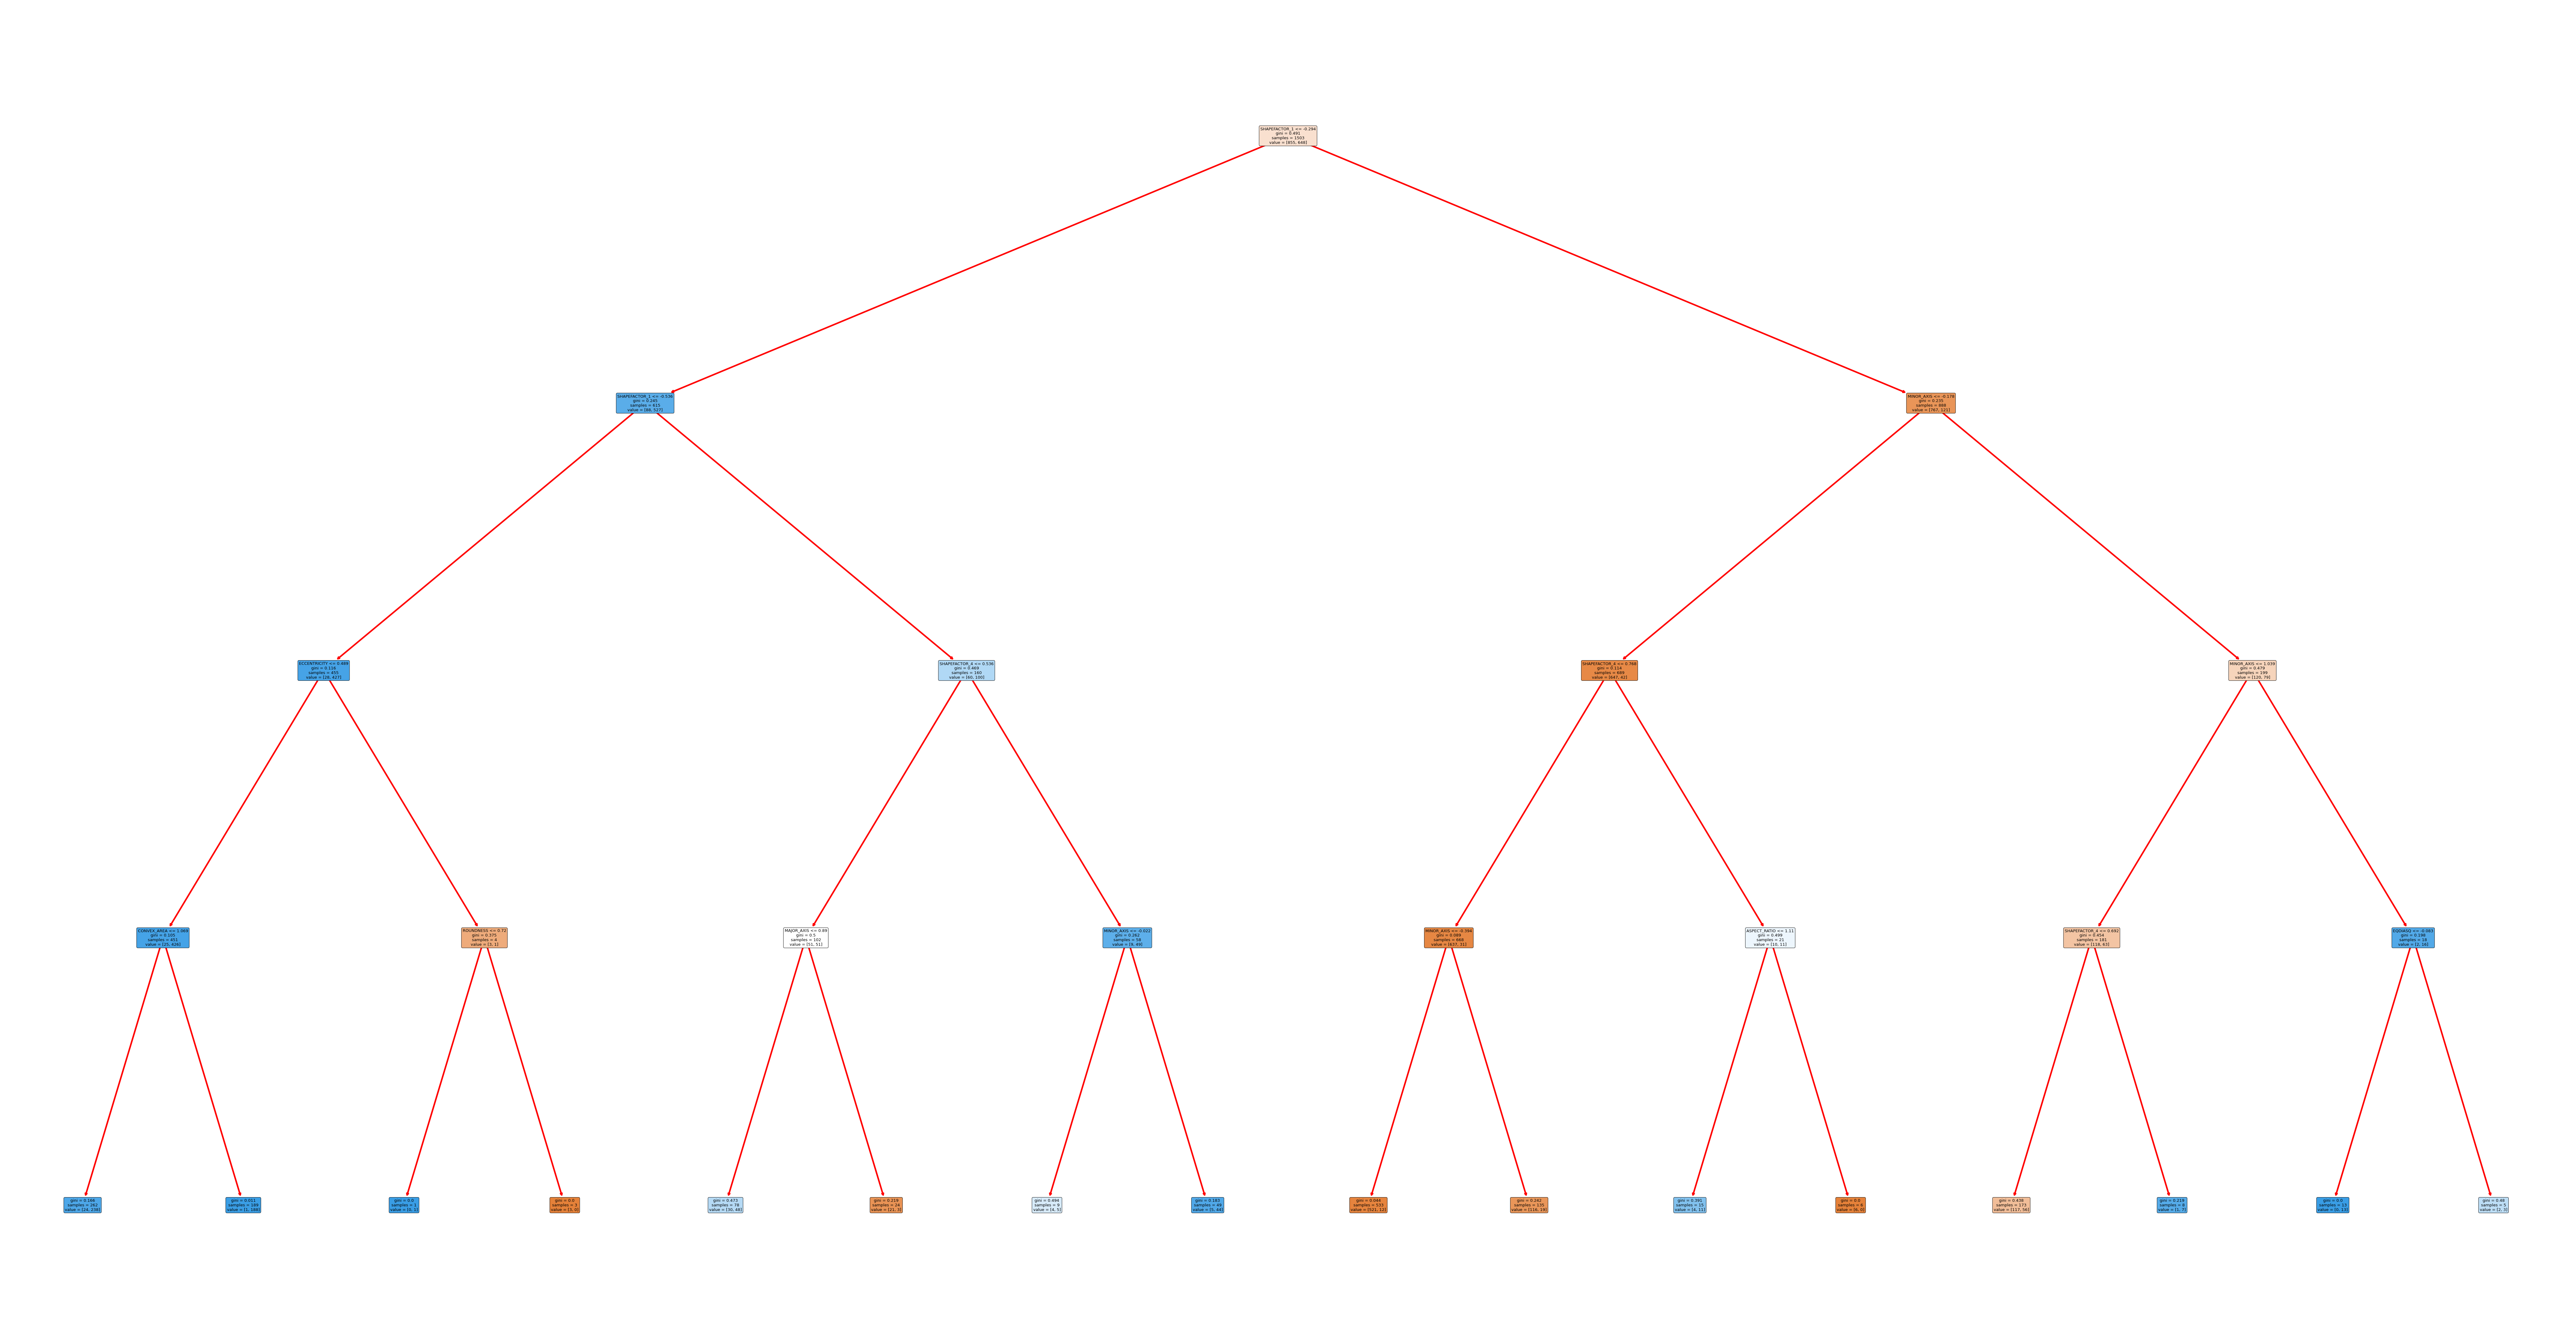

In [85]:
fig, ax= plt.subplots(figsize=(150,80))
chart=tree.plot_tree(dt, feature_names=df.columns, fontsize=13, filled=True, rounded=True)

for node in chart:
    arrow=node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(5)

#### Cross Validation Score

In [86]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.8627907  0.85813953 0.84186047 0.84382284 0.86013986]
CVS Mean: 0.8533506803274244
CVS Standard Deviation: 0.008728627979871208


#### Bagging

In [87]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [88]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       377
         1.0       0.83      0.85      0.84       268

    accuracy                           0.86       645
   macro avg       0.86      0.86      0.86       645
weighted avg       0.86      0.86      0.86       645



In [89]:
accuracy_score(ytest,ypred)

0.8635658914728682

In [90]:
confusion_matrix(ytest,ypred)

array([[329,  48],
       [ 40, 228]])

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [92]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       377
         1.0       0.81      0.84      0.83       268

    accuracy                           0.85       645
   macro avg       0.85      0.85      0.85       645
weighted avg       0.85      0.85      0.85       645



In [93]:
accuracy_score(ytest,ypred)

0.8527131782945736

In [94]:
confusion_matrix(ytest,ypred)

array([[325,  52],
       [ 43, 225]])

#### Cross Validation Score

In [95]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.8744186  0.8744186  0.85348837 0.84382284 0.87179487]
CVS Mean: 0.8635886594026129
CVS Standard Deviation: 0.012606511168993128


# Support Vector Classifier

In [96]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [97]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       377
         1.0       0.84      0.85      0.85       268

    accuracy                           0.87       645
   macro avg       0.87      0.87      0.87       645
weighted avg       0.87      0.87      0.87       645



In [98]:
confusion_matrix(ytest,ypred)

array([[334,  43],
       [ 40, 228]])

In [99]:
accuracy_score(ytest,ypred)

0.8713178294573644

In [100]:
svc=SVC(kernel="linear")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [101]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88       377
         1.0       0.82      0.84      0.83       268

    accuracy                           0.86       645
   macro avg       0.85      0.85      0.85       645
weighted avg       0.86      0.86      0.86       645



In [102]:
accuracy_score(ytest,ypred)

0.8558139534883721

In [103]:
confusion_matrix(ytest,ypred)

array([[326,  51],
       [ 42, 226]])

#### Hyper-Parameter Tuning

In [104]:
params={
    "C": np.logspace(-3,3,7),
    "kernel": ["rbf"]
}

In [105]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(svc,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...............C=0.001, kernel=rbf;, score=0.568 total time=   0.2s
[CV 2/5] END ...............C=0.001, kernel=rbf;, score=0.568 total time=   0.2s
[CV 3/5] END ...............C=0.001, kernel=rbf;, score=0.568 total time=   0.2s
[CV 4/5] END ...............C=0.001, kernel=rbf;, score=0.570 total time=   0.2s
[CV 5/5] END ...............C=0.001, kernel=rbf;, score=0.570 total time=   0.2s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.827 total time=   0.2s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.887 total time=   0.2s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.837 total time=   0.1s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.847 total time=   0.1s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.857 total time=   0.1s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['rbf']},
             verbose=3)

In [106]:
grid.best_score_

0.8788947951273531

In [107]:
grid.best_params_

{'C': 10.0, 'kernel': 'rbf'}

In [108]:
grid.best_estimator_

SVC(C=10.0)

In [109]:
svc=grid.best_estimator_
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [110]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88       377
         1.0       0.83      0.86      0.84       268

    accuracy                           0.87       645
   macro avg       0.86      0.87      0.86       645
weighted avg       0.87      0.87      0.87       645



In [111]:
accuracy_score(ytest,ypred)

0.8666666666666667

In [112]:
confusion_matrix(ytest,ypred)

array([[329,  48],
       [ 38, 230]])

#### Cross Validation Score

In [113]:
cvs=cross_val_score(svc,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.74418605 0.78837209 0.81627907 0.75058275 0.78787879]
CVS Mean: 0.7774597495527729
CVS Standard Deviation: 0.026698642696926195


#### Bagging

In [114]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(svc)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [115]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       377
         1.0       0.83      0.86      0.85       268

    accuracy                           0.87       645
   macro avg       0.87      0.87      0.87       645
weighted avg       0.87      0.87      0.87       645



In [116]:
accuracy_score(ytest,ypred)

0.8697674418604651

In [117]:
confusion_matrix(ytest,ypred)

array([[331,  46],
       [ 38, 230]])

# Voting Classifier

In [118]:
models=[]
models.append(("KNN",KNeighborsClassifier()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Naive Bayes",GaussianNB()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))

In [119]:
from sklearn.ensemble import VotingClassifier
vt=VotingClassifier(estimators=models)
vt.fit(xtrain,ytrain)
ypred=vt.predict(xtest)

In [120]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       377
         1.0       0.83      0.83      0.83       268

    accuracy                           0.86       645
   macro avg       0.85      0.85      0.85       645
weighted avg       0.86      0.86      0.86       645



In [121]:
accuracy_score(ytest,ypred)

0.8573643410852713

In [122]:
confusion_matrix(ytest,ypred)

array([[331,  46],
       [ 46, 222]])

# Boosting

###### Ada Boosting

In [123]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(xtrain,ytrain)
ypred=abc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       377
         1.0       0.83      0.85      0.84       268

    accuracy                           0.87       645
   macro avg       0.86      0.86      0.86       645
weighted avg       0.87      0.87      0.87       645



In [124]:
accuracy_score(ytest,ypred)

0.8651162790697674

In [125]:
confusion_matrix(ytest,ypred)

array([[330,  47],
       [ 40, 228]])

###### Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred=gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       377
         1.0       0.81      0.88      0.85       268

    accuracy                           0.87       645
   macro avg       0.86      0.87      0.86       645
weighted avg       0.87      0.87      0.87       645



In [127]:
accuracy_score(ytest,ypred)

0.8666666666666667

In [128]:
confusion_matrix(ytest,ypred)

array([[322,  55],
       [ 31, 237]])

###### XG Boosting

In [129]:
from xgboost import XGBClassifier
xbc=XGBClassifier()
xbc.fit(xtrain,ytrain)
ypred=xbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88       377
         1.0       0.81      0.85      0.83       268

    accuracy                           0.86       645
   macro avg       0.85      0.86      0.86       645
weighted avg       0.86      0.86      0.86       645



In [130]:
accuracy_score(ytest,ypred)

0.8589147286821706

In [131]:
confusion_matrix(ytest,ypred)

array([[325,  52],
       [ 39, 229]])

# Deep Learning - Artificial Neural Network

In [132]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [133]:
ann=Sequential()

ann.add(Dense(units=16,activation="relu"))
ann.add(Dense(units=8,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
ann.fit(xtrain,ytrain,epochs=1000,batch_size=100,validation_data=(xtest,ytest))

2022-04-28 09:05:58.649008: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-28 09:05:58.776247: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
16/16 [==============================] - 1s 14ms/step - loss: 0.7616 - accuracy: 0.4591 - val_loss: 0.6901 - val_accuracy: 0.5380
Epoch 2/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.6012 - accuracy: 0.6527 - val_loss: 0.5889 - val_accuracy: 0.7256
Epoch 3/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.5235 - accuracy: 0.7824 - val_loss: 0.5315 - val_accuracy: 0.7814
Epoch 4/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.4770 - accuracy: 0.8283 - val_loss: 0.4932 - val_accuracy: 0.8186
Epoch 5/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.4430 - accuracy: 0.8510 - val_loss: 0.4639 - val_accuracy: 0.8248
Epoch 6/1000
16/16 [==============================] - 0s 7ms/step - loss: 0.4161 - accuracy: 0.8570 - val_loss: 0.4405 - val_accuracy: 0.8295
Epoch 7/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.3942 - accuracy: 0.8583 - val_loss: 0.4204 - val_accuracy: 0.8372
Epoch

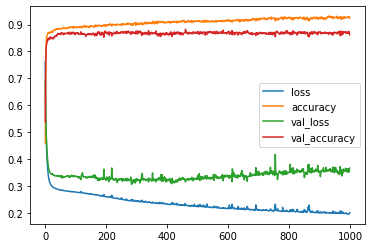

In [134]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

In [135]:
ann=Sequential()

ann.add(Dense(units=16,activation="relu"))
ann.add(Dense(units=8,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [136]:
from tensorflow.keras.callbacks import EarlyStopping

In [137]:
earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=50)

In [138]:
ann.fit(xtrain,ytrain,epochs=1000,batch_size=100,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/1000
16/16 [==============================] - 1s 11ms/step - loss: 0.8026 - accuracy: 0.3007 - val_loss: 0.7531 - val_accuracy: 0.3504
Epoch 2/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.7208 - accuracy: 0.3859 - val_loss: 0.6931 - val_accuracy: 0.4527
Epoch 3/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.6669 - accuracy: 0.5256 - val_loss: 0.6482 - val_accuracy: 0.5829
Epoch 4/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6187 - accuracy: 0.6367 - val_loss: 0.6054 - val_accuracy: 0.6915
Epoch 5/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.5738 - accuracy: 0.7206 - val_loss: 0.5659 - val_accuracy: 0.7333
Epoch 6/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.5267 - accuracy: 0.7764 - val_loss: 0.5247 - val_accuracy: 0.7705
Epoch 7/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.4797 - accuracy: 0.8024 - val_loss: 0.4868 - val_accuracy: 0.7969
Epoch

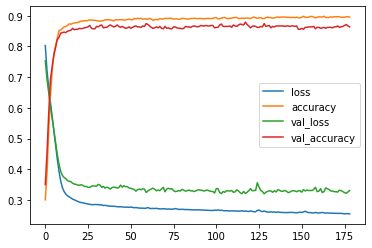

In [139]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

In [140]:
from tensorflow.keras.layers import Dropout

In [141]:
ann=Sequential()

ann.add(Dense(units=16,activation="relu"))
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=8,activation="relu"))
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [142]:
ann.fit(xtrain,ytrain,epochs=1000,batch_size=100,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/1000
16/16 [==============================] - 1s 12ms/step - loss: 0.7865 - accuracy: 0.5436 - val_loss: 0.6342 - val_accuracy: 0.6016
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.6221 - val_loss: 0.5679 - val_accuracy: 0.7070
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6069 - accuracy: 0.6753 - val_loss: 0.5219 - val_accuracy: 0.7767
Epoch 4/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.5590 - accuracy: 0.7332 - val_loss: 0.4850 - val_accuracy: 0.8078
Epoch 5/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.5087 - accuracy: 0.7758 - val_loss: 0.4500 - val_accuracy: 0.8202
Epoch 6/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.4700 - accuracy: 0.7924 - val_loss: 0.4182 - val_accuracy: 0.8310
Epoch 7/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.4361 - accuracy: 0.8210 - val_loss: 0.3916 - val_accuracy: 0.8403
Epoch

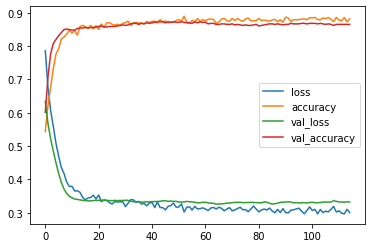

In [143]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

In [144]:
ypred=ann.predict(xtest)

In [145]:
ypred=ypred>0.5

In [146]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       377
         1.0       0.83      0.85      0.84       268

    accuracy                           0.87       645
   macro avg       0.86      0.86      0.86       645
weighted avg       0.87      0.87      0.87       645



In [147]:
accuracy_score(ytest,ypred)

0.8651162790697674

In [148]:
confusion_matrix(ytest,ypred)

array([[331,  46],
       [ 41, 227]])

# SUMMARY

###### The Accuracy achieved per model is as follows:

Model name: KNN
    - Initial Accuracy: 84.96%,
    - Accuracy Post Hyper-parameter Tuning: 86.20%,
    - Cross Validation Score: 77.09%,
    - Bagging Accuracy: 84.96%,
    - Best Accuracy Achieved: 84.96%
        
        
Model name: Logistic Regression
    - Initial Accuracy: 85.73%,
    - Accuracy Post Hyper-parameter Tuning: 88.15%,
    - Cross Validation Score: 86.68%,
    - Bagging Accuracy: 85.11%,
    - Best Accuracy Achieved: 88.15%

        
Model name: Naive Bayes
    - Initial Accuracy: 84.49%,
    - Cross Validation Score: 81.65%,
    - Bagging Accuracy: 84.65%,    
    - Best Accuracy Achieved: 84.65%

        
Model name: Decision Tree
    - Initial Accuracy: 78.75%,
    - Accuracy Post Hyper-parameter Tuning: 85.89%,
        Criterion Gini:
            Max Depth best Accuracy- 85.89%,
            Min Samples Leaf best Accuracy- 85.73%,
        Criterion Entropy:
            Max Depth best Accuracy- 85.11%,
            Min Samples Leaf best Accuracy- 85.89%,
    - Cross Validation Score: 85.33%,
    - Bagging Accuracy: 85.89%,
    - Best Accuracy Achieved: 85.89%

        
Model name: Random Forest
    - Initial Accuracy: 85.27%,
    - Cross Validation Score: 86.59%,
    - Best Accuracy Achieved: 96.25%
        

Model name: Support Vector Classifier
    - Initial Accuracy: 
        Kernel "rbf"- 87.13%,
        Kernel "linear"- 85.58%,
    - Accuracy Post Hyper-parameter Tuning: 86.66%,
    - Cross Validation Score: 77.74%,
    - Bagging Accuracy: 87.90%,
    - Best Accuracy Achieved: 87.90%
        
        
Voting Classifier Accuracy: 86.04%


Boosting:
    - Ada Boosting: 86.51%,
    - Gradient Boosting: 85.58%,
    - XG Boosting: 87.13%,
    
    
Deep Learning- Artificial Neural Network
    - Best Accuracy: 86.36%